In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("D:\ML_datasets\Car_price_cleaned.csv")
x = data.iloc[:, :].values
#print(x)
target_column = 'price'
X = data.drop(columns=[target_column])
y = data[target_column]
print(x)
#print(y)

[[1 3 'alfa-romero giulia' ... 441 729 4.875197323201151]
 [2 3 'alfa-romero stelvio' ... 441 729 4.875197323201151]
 [3 1 'alfa-romero Quadrifoglio' ... 361 676 5.030437921392435]
 ...
 [203 -1 'volvo 244dl' ... 324 529 5.159055299214529]
 [204 -1 'volvo 246' ... 676 729 4.983606621708336]
 [205 -1 'volvo 264gl' ... 361 625 4.955827057601261]]


In [3]:
print(data.isna().sum().any())

False


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder ='passthrough')
X = np.array(ct.fit_transform(X))


In [9]:
print(X)


  (0, 2)	1.0
  (0, 147)	1.0
  (0, 148)	3.0
  (0, 149)	1.0
  (0, 151)	1.0
  (0, 153)	2.0
  (0, 155)	-1.6907718018201774
  (0, 156)	-0.426521468357013
  (0, 157)	-0.8447823517277104
  (0, 158)	-2.020417304464712
  (0, 159)	-0.0145662821379261
  (0, 161)	2.0
  (0, 162)	0.0744489251157203
  (0, 163)	5.0
  (0, 164)	0.5190713849456007
  (0, 165)	-1.839377336831407
  (0, 166)	-0.2883489098618655
  (0, 167)	0.174482779162534
  (0, 168)	-0.2629602160773477
  (0, 169)	-0.6465530277621856
  (0, 170)	-0.5460587369032711
  (0, 171)	1.0
  (0, 172)	79.0
  (0, 173)	0.0435635792778649
  (0, 174)	7849.959999999999
  :	:
  (204, 163)	5.0
  (204, 164)	1.666444828886216
  (204, 165)	-0.336969686749123
  (204, 166)	-0.1621608675903209
  (204, 167)	0.2505330337230999
  (204, 168)	0.5776923265480921
  (204, 169)	-0.9530116883199848
  (204, 170)	-0.8371953846670438
  (204, 171)	26.0
  (204, 172)	10.0
  (204, 173)	0.0372305682560418
  (204, 174)	11902.81
  (204, 175)	35645.44
  (204, 176)	4747.210000000001
  (2

In [11]:
from scipy.sparse import issparse

if X.dtype == object:
    X = X.item()  # Unwrap the sparse matrix

# If X is still sparse, keep it sparse or convert to dense if needed
if issparse(X):
    X = X.tocsr() 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


c:\Users\saiak\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18366540.77603032, tolerance: 1070127.8490134159
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\saiak\AppData\Local\Temp\ipykernel_27320\3591807635.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(results_df.index, rotation=30, ha="right")
C:\Users\saiak\AppData\Local\Temp\ipykernel_27320\3591807635.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(results_df.index, rotation=30, ha="right")
C:\Users\saiak\AppData\Local\Temp\ipykernel_27320\3591807635.py:50: UserWarning: set_ticklabels() should only be used with a fixed numbe

Model Performance Metrics:
                            MAE           MSE  R² Score
Linear Regression  2334.993055  1.093078e+07  0.801080
Ridge Regression   2100.014508  1.108049e+07  0.798355
Lasso Regression   2960.864099  2.019327e+07  0.632519


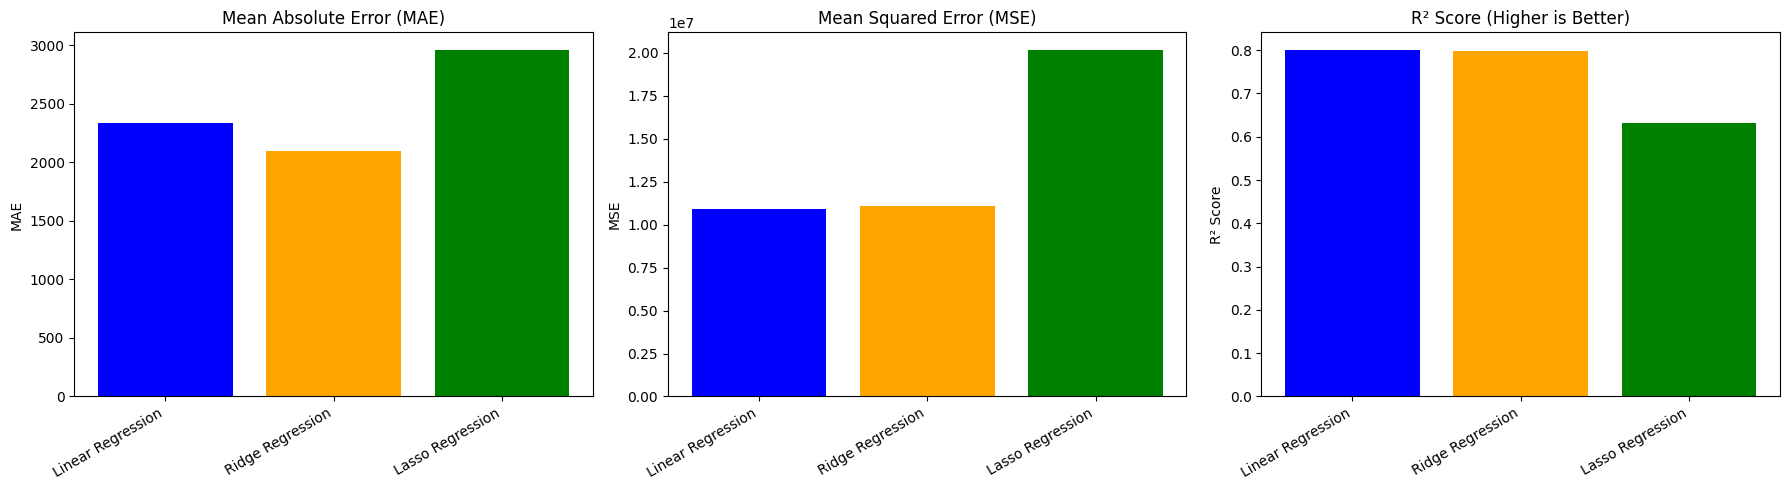

In [15]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=5000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R² Score": r2
    }

# Convert results into a DataFrame and display
results_df = pd.DataFrame(results).T
print("Model Performance Metrics:\n", results_df)

# Plot performance metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE
axes[0].bar(results_df.index, results_df["MAE"], color=['blue', 'orange', 'green'])
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")
axes[0].set_xticklabels(results_df.index, rotation=30, ha="right")

# Plot MSE
axes[1].bar(results_df.index, results_df["MSE"], color=['blue', 'orange', 'green'])
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")
axes[1].set_xticklabels(results_df.index, rotation=30, ha="right")

# Plot R² Score
axes[2].bar(results_df.index, results_df["R² Score"], color=['blue', 'orange', 'green'])
axes[2].set_title("R² Score (Higher is Better)")
axes[2].set_ylabel("R² Score")
axes[2].set_xticklabels(results_df.index, rotation=30, ha="right")

# Display the plots
plt.tight_layout()
plt.show()

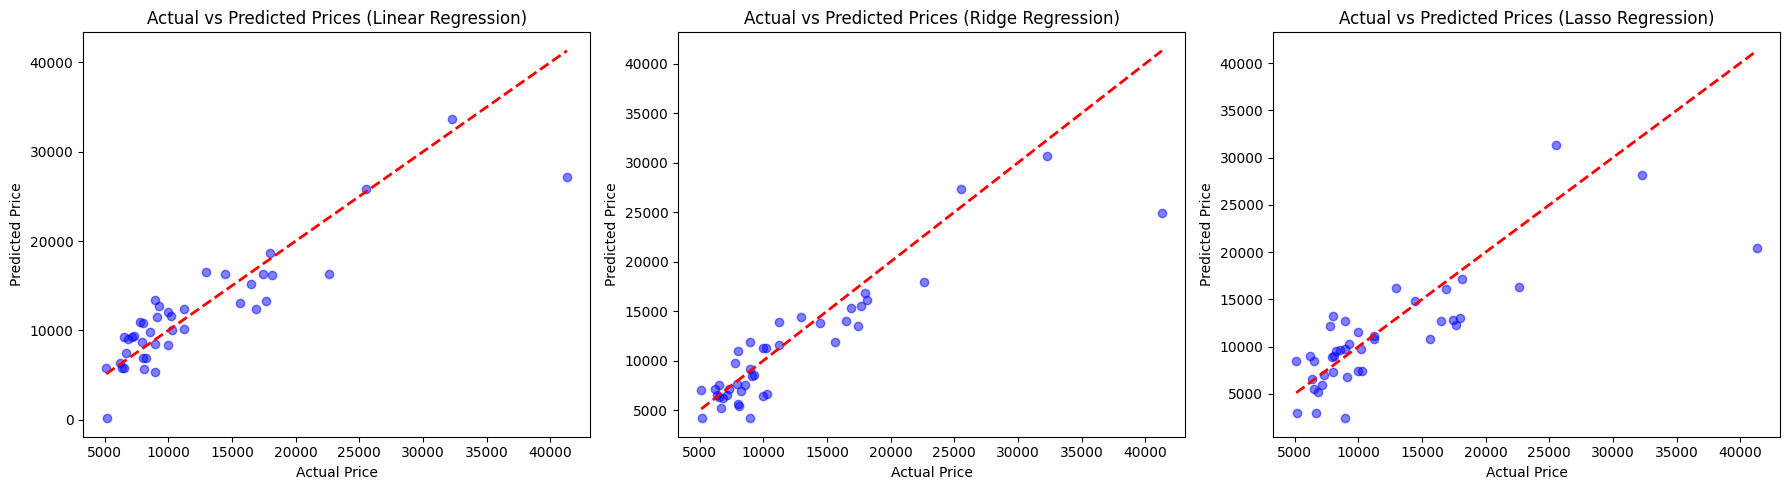

In [16]:
# Scatter plot of Actual vs. Predicted values for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    
    # Scatter plot
    axes[idx].scatter(y_test, y_pred, alpha=0.5, color='blue')
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line (Perfect Prediction)
    axes[idx].set_title(f"Actual vs Predicted Prices ({name})")
    axes[idx].set_xlabel("Actual Price")
    axes[idx].set_ylabel("Predicted Price")

# Display the plots
plt.tight_layout()
plt.show()
